# Load image & data augmentation

(192, 263, 3)


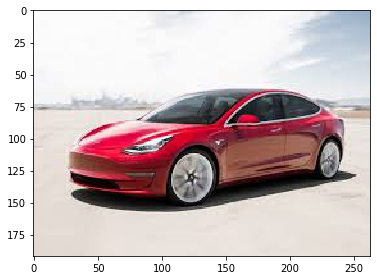

In [162]:
from skimage.io import imread, imshow
import matplotlib.pyplot as plt
%matplotlib inline

image_color = imread('car.jpeg', as_gray=False)
print(image_color.shape)
imshow(image_color)

## Choose the anchor patch.

Rectangle(xy=(120, 90), width=32, height=32, angle=0)


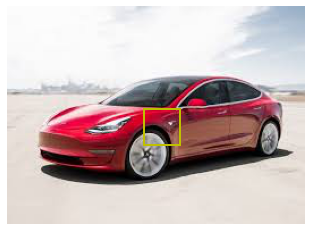

In [164]:
import matplotlib.patches as patches
from matplotlib.patches import Rectangle
fig, ax = plt.subplots()
im = ax.imshow(image_color)
pat = ax.add_patch(Rectangle((120, 90), 
                        32, 32, 
                        fc ='none',  
                        ec ='y', 
                        lw = 2))
print(pat)
ax.axis('off')
plt.show()

(32, 32, 3)


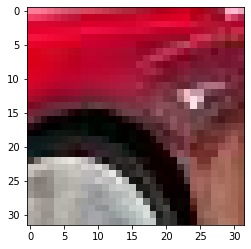

In [166]:
img = image_color
#anchor [i,j]
i = 90
j = 120
pat = img[i:i+32,j:j+32]
print(pat.shape)
plt.imshow(pat)
plt.show()

## Choose the random patch.

Rectangle(xy=(150, 80), width=32, height=32, angle=0)


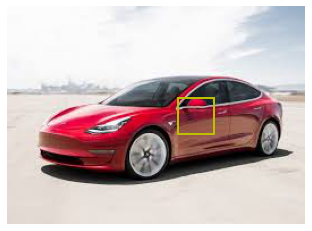

In [169]:
import matplotlib.patches as patches
from matplotlib.patches import Rectangle
fig2, ax2 = plt.subplots()
im2 = ax2.imshow(image_color)
rand_pat = ax2.add_patch(Rectangle((150, 80), 
                        32, 32, 
                        fc ='none',  
                        ec ='y', 
                        lw = 2))
print(rand_pat)
ax2.axis('off')
plt.show()

(32, 32, 3)


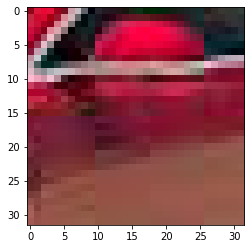

In [171]:
img2 = image_color
#anchor [i,j]
i2 = 80
j2 = 150
rand_pat = img2[i2:i2+32,j2:j2+32]
print(rand_pat.shape)
plt.imshow(rand_pat)
plt.show()

<PIL.Image.Image image mode=RGB size=32x32 at 0x7FDFDF8E4B38>
<PIL.Image.Image image mode=RGB size=32x32 at 0x7FDFDF8E42B0>


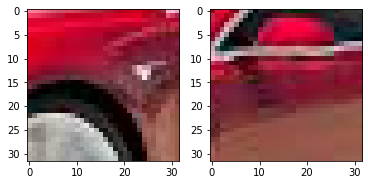

In [172]:
import torch
from PIL import Image
import numpy as np
#img_pil = Image.fromarray(image_color)
img_pil = Image.fromarray(pat)
img_pil2 = Image.fromarray(rand_pat)
print(img_pil)
print(img_pil2)
plt.figure(1)
plt.subplot(121)
plt.imshow(img_pil)
plt.subplot(122)
plt.imshow(img_pil2)
plt.show()
#img_pil.show()

## Color distortion

In [173]:
def get_color_distortion(s=1.0):
    color_jitter = T.ColorJitter(0.8 * s, 0.8 * s, 0.8 * s, 0.2 * s)  #same as SimCLR.
    rnd_color_jitter = T.RandomApply([color_jitter], p=0.8)
    
    # p is the probability of grayscale, here 0.2
    rnd_gray = T.RandomGrayscale(p=0.2)
    color_distort = T.Compose([rnd_color_jitter, rnd_gray])
    
    return color_distort

## Get the augmented anchor patch on image

<PIL.Image.Image image mode=RGB size=32x32 at 0x7FDFDD3DA7F0>


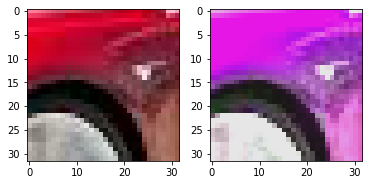

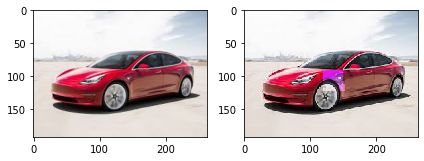

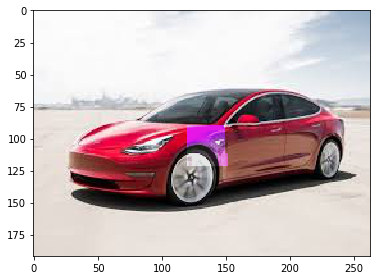

In [190]:
from torchvision import transforms as T

def mutate_image(img):
        #res = T.RandomResizedCrop(32)(img)
        res = get_color_distortion(1)(img)
        return res
mutate_pat = mutate_image(img_pil)
print(mutate_pat)

#plt.imshow(mutate_pat)
plt.figure(1)
plt.subplot(121)
plt.imshow(img_pil)
plt.subplot(122)
plt.imshow(mutate_pat)
plt.show()
ori_img = imread('car.jpeg', as_gray=False)
i = 90
j = 120
img[i:i+32,j:j+32]= mutate_pat
img[i2:i2+32,j2:j2+32] = img_pil2
plt.figure(2)
plt.subplot(121)
plt.imshow(ori_img)
plt.subplot(122)
imshow(img)
plt.figure(3)
imshow(img)
plt.savefig('color11.png')
plt.show()

## Get the augmented random patch on image.

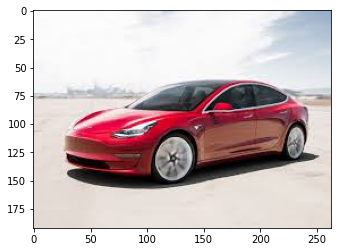

In [191]:
plt.imshow(ori_img)
plt.show()

<PIL.Image.Image image mode=RGB size=32x32 at 0x7FDFC1BDF630>


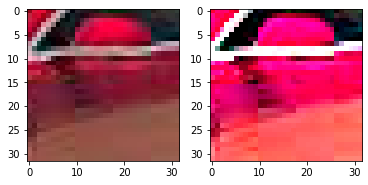

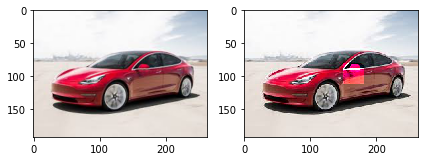

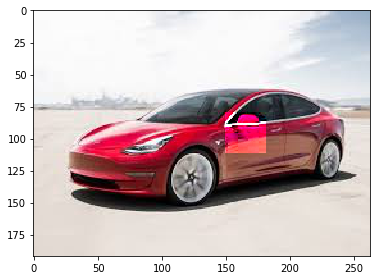

In [193]:
mutate_rand_pat = mutate_image(img_pil2)
print(mutate_rand_pat)
plt.figure(1)
plt.subplot(121)
plt.imshow(img_pil2)
plt.subplot(122)
plt.imshow(mutate_rand_pat)
plt.show()
img2 = ori_img
img2[i2:i2+32,j2:j2+32]= mutate_rand_pat
plt.figure(2)
plt.subplot(121)
plt.imshow(ori_img2)
plt.subplot(122)
imshow(img2)
plt.figure(3)
imshow(img2)
plt.savefig('color12.png')
plt.show()

## Show the three images together.

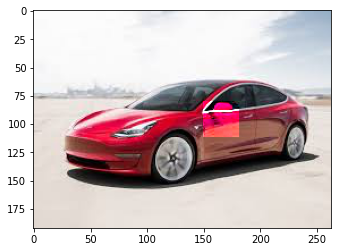

In [201]:
img2[i2:i2+32,j2:j2+32]= mutate_rand_pat
plt.imshow(img2)
plt.show()

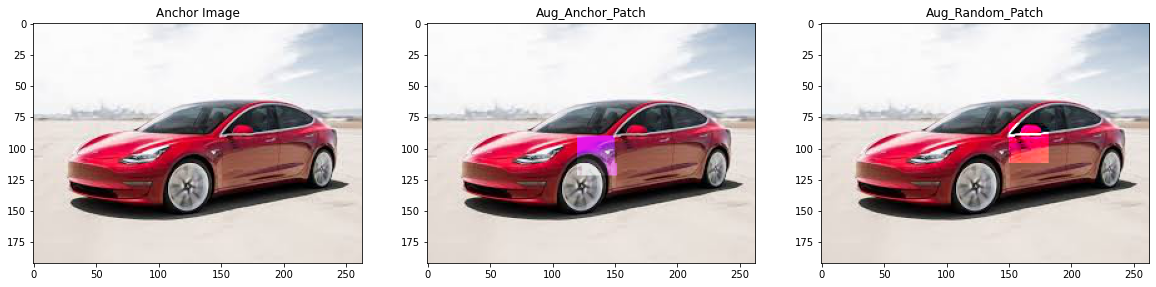

In [203]:
#ori_img = imread('car.jpeg', as_gray=False)
#img[i2:i2+32,j2:j2+32] = rand_pat
anchor_img = imread('car.jpeg', as_gray=False)
plt.figure(figsize=(20,60))
plt.subplot(131)
plt.imshow(anchor_img)
plt.title('Anchor Image')
plt.subplot(132)
plt.imshow(img)
plt.title('Aug_Anchor_Patch')
plt.subplot(133)
plt.imshow(img2)
plt.title('Aug_Random_Patch')
plt.show()

In [204]:
def tensorify(img):
        res = T.ToTensor()(img)
        res = T.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))(res)
        return res

In [205]:
print(img.shape)
print(tensorify(img).shape)
print(ori_img.shape)

(192, 263, 3)
torch.Size([3, 192, 263])
(192, 263, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 192, 263])
(3, 192, 263)


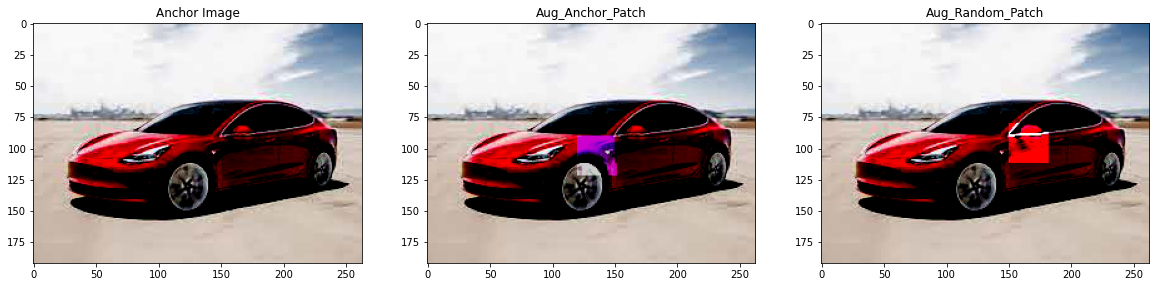

In [212]:
import numpy as np
T_anchor = tensorify(anchor_img)
print(T_anchor.shape)
T_anchor_1 = T_anchor.numpy()
print(T_anchor_1.shape)
T_anchor_11 = np.transpose(T_anchor_1,(1,2,0))
T_img = tensorify(img)
T_img_1 = T_img.numpy()
T_img_11 = np.transpose(T_img_1,(1,2,0))
T_img2 = tensorify(img2)
T_img2_1 = T_img2.numpy()
T_img2_11 = np.transpose(T_img2_1,(1,2,0))
plt.figure(figsize=(20,60))
plt.subplot(131)
plt.imshow(T_anchor_11)
plt.title('Anchor Image')
plt.subplot(132)
plt.imshow(T_img_11)
plt.title('Aug_Anchor_Patch')
plt.subplot(133)
plt.imshow(T_img2_11)
plt.title('Aug_Random_Patch')
plt.show()

## Color Jitter

<PIL.Image.Image image mode=RGB size=32x32 at 0x7FDFE2E05BE0>


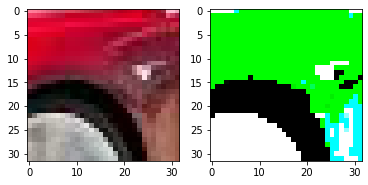

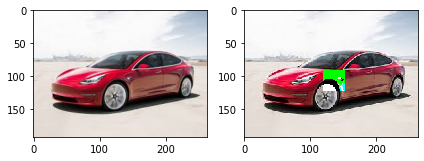

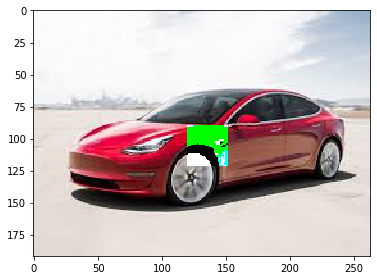

In [89]:
def color_jitter(img):
    brightness = (1, 10)
    contrast = (1, 8)
    saturation = (1, 8)
    hue = (0.2, 0.4)
    transform = T.ColorJitter(brightness, contrast, saturation, hue)
    color_jitter_img = transform(img)
    return color_jitter_img
CJ_pat = color_jitter(img_pil)
print(CJ_pat)
plt.figure(1)
plt.subplot(121)
plt.imshow(img_pil)
plt.subplot(122)
plt.imshow(CJ_pat)
i = 90
j = 120
img[i:i+32,j:j+32]= CJ_pat
plt.figure(2)
plt.subplot(121)
plt.imshow(ori_img)
plt.subplot(122)
imshow(img)
plt.figure(3)
imshow(img)
plt.savefig('color_6.png')
plt.show()

# Model Architecture

In [217]:
from torchsummary import summary
import torch.nn as nn
import torch.optim as optim
from torchvision.models import resnet18
from collections import OrderedDict
# defining our deep learning architecture
resnet = resnet18(pretrained=True)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
classifier = nn.Sequential(OrderedDict([
    ('fc1', nn.Linear(resnet.fc.in_features, 256)),
    ('added_relu1', nn.ReLU(inplace=True)),
    ('fc2', nn.Linear(256, 64)),
    ('added_relu2', nn.ReLU(inplace=True)),
    ('fc3', nn.Linear(64, 128))
]))

resnet.fc = classifier
resnet.to(device)
summary(resnet, (3, 192, 263))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [-1, 64, 96, 132]           9,408
       BatchNorm2d-2          [-1, 64, 96, 132]             128
              ReLU-3          [-1, 64, 96, 132]               0
         MaxPool2d-4           [-1, 64, 48, 66]               0
            Conv2d-5           [-1, 64, 48, 66]          36,864
       BatchNorm2d-6           [-1, 64, 48, 66]             128
              ReLU-7           [-1, 64, 48, 66]               0
            Conv2d-8           [-1, 64, 48, 66]          36,864
       BatchNorm2d-9           [-1, 64, 48, 66]             128
             ReLU-10           [-1, 64, 48, 66]               0
       BasicBlock-11           [-1, 64, 48, 66]               0
           Conv2d-12           [-1, 64, 48, 66]          36,864
      BatchNorm2d-13           [-1, 64, 48, 66]             128
             ReLU-14           [-1, 64,

# Get the representation of three images.

In [218]:
T_anchor = T_anchor.reshape(1,3,192,263).to(device)
T_img = T_img.reshape(1,3,192,263).to(device)
T_img2 = T_img2.reshape(1,3,192,263).to(device)
anchor = resnet(T_anchor)
positive = resnet(T_img)
negative = resnet(T_img2)
print(anchor)
print(anchor.shape)

tensor([[ 0.0516,  0.1694,  0.1229, -0.1140, -0.1778, -0.0551,  0.0730, -0.0902,
          0.0236,  0.0412, -0.0118,  0.0230, -0.0066,  0.2575,  0.1091, -0.0158,
         -0.0751,  0.0157,  0.1751,  0.0312,  0.0847,  0.0751, -0.0207,  0.0180,
          0.1115, -0.0367, -0.1099,  0.0233, -0.0641,  0.0857, -0.0753,  0.0616,
         -0.0628, -0.0065, -0.1538, -0.0213,  0.0212,  0.0292,  0.0098,  0.1584,
          0.0984,  0.0141, -0.1927,  0.0791, -0.0538,  0.0065,  0.0582,  0.0110,
          0.1606,  0.1590, -0.0850,  0.0280, -0.1264,  0.0898, -0.1608, -0.1386,
          0.0978, -0.0662,  0.0218, -0.0338,  0.0195, -0.1195, -0.0995, -0.0705,
         -0.1582, -0.0717, -0.1974,  0.1263, -0.0139,  0.1802,  0.0111, -0.0587,
         -0.1296, -0.0709,  0.1677,  0.0429,  0.0619, -0.0118,  0.0031,  0.0346,
          0.1209, -0.3169, -0.0989,  0.0886, -0.0272, -0.0359,  0.0426, -0.1523,
          0.0948, -0.0741,  0.2296, -0.0293,  0.0418,  0.0264, -0.0264,  0.0450,
          0.0316,  0.1052,  

In [220]:
print(positive)
print(positive.shape)

tensor([[ 0.0540,  0.1653,  0.1219, -0.1128, -0.1786, -0.0541,  0.0711, -0.0894,
          0.0255,  0.0458, -0.0100,  0.0247, -0.0016,  0.2567,  0.1100, -0.0176,
         -0.0749,  0.0164,  0.1749,  0.0333,  0.0877,  0.0734, -0.0179,  0.0188,
          0.1119, -0.0404, -0.1078,  0.0235, -0.0656,  0.0843, -0.0747,  0.0617,
         -0.0695, -0.0083, -0.1571, -0.0203,  0.0232,  0.0274,  0.0103,  0.1629,
          0.1026,  0.0105, -0.1910,  0.0811, -0.0531,  0.0060,  0.0571,  0.0165,
          0.1645,  0.1559, -0.0822,  0.0244, -0.1239,  0.0893, -0.1650, -0.1410,
          0.0973, -0.0605,  0.0205, -0.0403,  0.0156, -0.1174, -0.1001, -0.0683,
         -0.1639, -0.0757, -0.1989,  0.1327, -0.0137,  0.1767,  0.0119, -0.0622,
         -0.1330, -0.0726,  0.1723,  0.0459,  0.0574, -0.0100,  0.0072,  0.0360,
          0.1234, -0.3203, -0.0978,  0.0915, -0.0251, -0.0333,  0.0459, -0.1505,
          0.0965, -0.0759,  0.2306, -0.0306,  0.0438,  0.0225, -0.0211,  0.0503,
          0.0325,  0.1046,  

In [221]:
print(negative)
print(negative.shape)

tensor([[ 0.0522,  0.1656,  0.1244, -0.1140, -0.1765, -0.0575,  0.0714, -0.0918,
          0.0272,  0.0420, -0.0138,  0.0261, -0.0056,  0.2590,  0.1083, -0.0164,
         -0.0731,  0.0151,  0.1745,  0.0334,  0.0867,  0.0735, -0.0203,  0.0204,
          0.1141, -0.0347, -0.1111,  0.0261, -0.0605,  0.0863, -0.0752,  0.0584,
         -0.0675, -0.0061, -0.1570, -0.0231,  0.0206,  0.0308,  0.0132,  0.1615,
          0.0983,  0.0111, -0.1951,  0.0809, -0.0528,  0.0046,  0.0618,  0.0113,
          0.1579,  0.1591, -0.0826,  0.0269, -0.1240,  0.0884, -0.1629, -0.1361,
          0.0951, -0.0659,  0.0213, -0.0393,  0.0157, -0.1191, -0.0975, -0.0687,
         -0.1587, -0.0765, -0.1960,  0.1271, -0.0178,  0.1799,  0.0093, -0.0593,
         -0.1288, -0.0739,  0.1709,  0.0414,  0.0602, -0.0085,  0.0030,  0.0337,
          0.1191, -0.3169, -0.1016,  0.0874, -0.0321, -0.0354,  0.0406, -0.1515,
          0.0947, -0.0768,  0.2294, -0.0294,  0.0447,  0.0282, -0.0243,  0.0464,
          0.0316,  0.1065,  

In [219]:
triplet_loss = nn.TripletMarginLoss(margin=1.0, p=2)
output = triplet_loss(anchor, positive, negative)
print(output)
print(output.shape)

tensor(1.0076, device='cuda:0', grad_fn=<MeanBackward0>)
torch.Size([])


In [224]:
output.backward()

# Try NT-Xent Loss

In [222]:
# Code for NT-Xent Loss function, explained in more detail in the article

tau = 0.05

def loss_function(a, b):
    a_norm = torch.norm(a, dim=1).reshape(-1, 1)
    a_cap = torch.div(a, a_norm)
    b_norm = torch.norm(b, dim=1).reshape(-1, 1)
    b_cap = torch.div(b, b_norm)
    a_cap_b_cap = torch.cat([a_cap, b_cap], dim=0)
    a_cap_b_cap_transpose = torch.t(a_cap_b_cap)
    b_cap_a_cap = torch.cat([b_cap, a_cap], dim=0)
    sim = torch.mm(a_cap_b_cap, a_cap_b_cap_transpose)
    sim_by_tau = torch.div(sim, tau)
    exp_sim_by_tau = torch.exp(sim_by_tau)
    sum_of_rows = torch.sum(exp_sim_by_tau, dim=1)
    exp_sim_by_tau_diag = torch.diag(exp_sim_by_tau)
    numerators = torch.exp(torch.div(torch.nn.CosineSimilarity()(a_cap_b_cap, b_cap_a_cap), tau))
    denominators = sum_of_rows - exp_sim_by_tau_diag
    num_by_den = torch.div(numerators, denominators)
    neglog_num_by_den = -torch.log(num_by_den)
    return torch.mean(neglog_num_by_den)

## compute the NT-Xent loss independently for three pairs of images.

In [223]:
NT_loss_anc_pos = loss_function(anchor, positive)
NT_loss_anc_neg = loss_function(anchor, negative)
NT_loss_pos_neg = loss_function(positive, negative)
print('NT_loss between anchor & positive')
print(NT_loss_anc_pos)
print('NT_loss between anchor & negative')
print(NT_loss_anc_neg)
print('NT_loss between positive & negative')
print(NT_loss_pos_neg)

NT_loss between anchor & positive
tensor(0., device='cuda:0', grad_fn=<MeanBackward0>)
NT_loss between anchor & negative
tensor(2.9802e-08, device='cuda:0', grad_fn=<MeanBackward0>)
NT_loss between positive & negative
tensor(2.9802e-08, device='cuda:0', grad_fn=<MeanBackward0>)


# Other Data Augmentation techniques

# horizon_flip

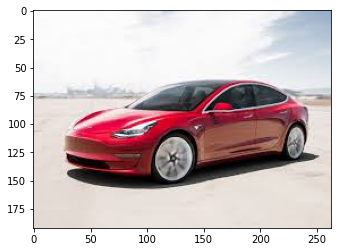

In [160]:
ori_img2 = imread('car.jpeg', as_gray=False)
plt.imshow(ori_img2)
ori_img3 = imread('car.jpeg', as_gray=False)
plt.imshow(ori_img3)

<PIL.Image.Image image mode=RGB size=32x32 at 0x7FDFDF8F7198>


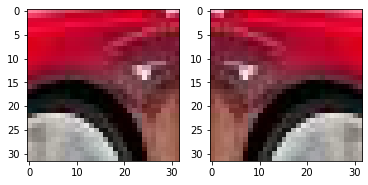

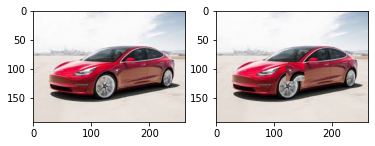

In [161]:
def horizon_flip(img):
    p = 0.8
    transform = T.RandomHorizontalFlip(p)
    HF_pat = transform(img)
    return HF_pat
HF_pat = horizon_flip(img_pil)
print(HF_pat)
plt.figure(1)
plt.subplot(121)
plt.imshow(img_pil)
plt.subplot(122)
plt.imshow(HF_pat)
mut_img2 = ori_img2
i1=90
j1=120
mut_img2[i1:i1+32,j1:j1+32] = HF_pat
plt.figure(2)
plt.subplot(121)
plt.imshow(ori_img3)
plt.subplot(122)
plt.imshow(mut_img2)
plt.show()

# Random Affine

<PIL.Image.Image image mode=RGB size=32x32 at 0x7FDFE2E28B38>


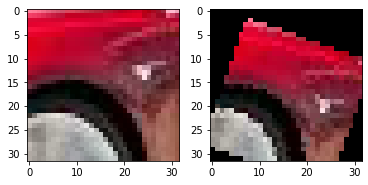

In [137]:
def affine(img):
    degrees = (15, 20)
    translate=(0, 0.2)
    scale=(0.8, 1)
    fillcolor =  None
    transform = T.RandomAffine(degrees=degrees, translate=translate, scale=scale, fillcolor=fillcolor)
    random_affine = transform(img)
    return random_affine
AF_pat=affine(img_pil)
print(AF_pat)
plt.figure(1)
plt.subplot(121)
plt.imshow(img_pil)
plt.subplot(122)
plt.imshow(AF_pat)

# Crop and resize

<PIL.Image.Image image mode=RGB size=30x30 at 0x7FDFE2D9A2B0>


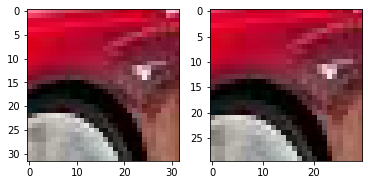

In [139]:
def crop_resize(img):
    size = (30,30)
    transform = T.CenterCrop(size)
    center_crop = transform(img)
    return center_crop
CR_pat = crop_resize(img_pil)
'''def crop_pad(img):
    size = (30, 30)
    padding = 4
    fill = (0, 255, 255)
    transform = T.Compose([T.CenterCrop(size),T.Pad(padding, fill)])
    pad = transform(img)
    return pad'''
#CR_pat = crop_pad(img)
print(CR_pat)
plt.figure(1)
plt.subplot(121)
plt.imshow(img_pil)
plt.subplot(122)
plt.imshow(CR_pat)
CR_pat.show()

# Crop and resize+ padding

<PIL.Image.Image image mode=RGB size=34x34 at 0x7FDFF03FD588>


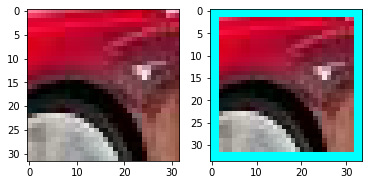

In [141]:
def crop_pad(img):
    size = (30, 30)
    padding = 2
    fill = (0, 255, 255)
    transform = T.Compose([T.CenterCrop(size),T.Pad(padding, fill)])
    pad = transform(img)
    return pad
CRP_pat = crop_pad(img_pil)
print(CRP_pat)
plt.figure(1)
plt.subplot(121)
plt.imshow(img_pil)
plt.subplot(122)
plt.imshow(CRP_pat)
CR_pat.show()